<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.123578,54.829044,74.273898,-0.000018,201.226502,201.226369,0.000134
1,0.0,1.0,71.486505,79.152946,92.438142,0.000214,253.077806,253.077718,0.000088
2,0.0,2.0,20.070516,26.649802,92.764476,-0.001470,149.483324,149.484267,-0.000943
3,0.0,3.0,73.796299,87.256738,85.529417,-0.000143,256.582311,256.582652,-0.000341
4,0.0,4.0,62.358430,56.624725,64.213060,-0.000470,193.195744,193.196067,-0.000322
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.064880,36.957519,33.978675,0.000616,146.001689,146.001065,0.000624
29996,999.0,26.0,97.630159,92.869136,46.675263,-0.000099,247.174459,247.174656,-0.000197
29997,999.0,27.0,94.001023,82.372889,58.508710,0.000041,244.882663,244.882724,-0.000061
29998,999.0,28.0,42.284699,99.054924,51.497629,-0.000167,202.837085,202.837160,-0.000074


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.123578  54.829044  74.273898  ...  201.226502  201.226369  0.000134
      1.0    71.486505  79.152946  92.438142  ...  253.077806  253.077718  0.000088
      2.0    20.070516  26.649802  92.764476  ...  149.483324  149.484267 -0.000943
      3.0    73.796299  87.256738  85.529417  ...  256.582311  256.582652 -0.000341
      4.0    62.358430  56.624725  64.213060  ...  193.195744  193.196067 -0.000322
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   65.064880  36.957519  33.978675  ...  146.001689  146.001065  0.000624
      26.0   97.630159  92.869136  46.675263  ...  247.174459  247.174656 -0.000197
      27.0   94.001023  82.372889  58.508710  ...  244.882663  244.882724 -0.000061
      28.0   42.284699  99.054924  51.497629  ...  202.837085  202.837160 -0.000074
      29.0   36.849566  94.237601  85.986361  ...  227.073474  227.073457  0.000017

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.123578  54.829044  74.273898  ...  201.226502  201.226369  0.000134
      1.0    71.486505  79.152946  92.438142  ...  253.077806  253.077718  0.000088
      2.0    20.070516  26.649802  92.764476  ...  149.483324  149.484267 -0.000943
      3.0    73.796299  87.256738  85.529417  ...  256.582311  256.582652 -0.000341
      4.0    62.358430  56.624725  64.213060  ...  193.195744  193.196067 -0.000322
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   65.064880  36.957519  33.978675  ...  146.001689  146.001065  0.000624
      26.0   97.630159  92.869136  46.675263  ...  247.174459  247.174656 -0.000197
      27.0   94.001023  82.372889  58.508710  ...  244.882663  244.882724 -0.000061
      28.0   42.284699  99.054924  51.497629  ...  202.837085  202.837160 -0.000074
      29.0   36.849566  94.237601  85.986361  ...  227.073474  227.073457  0.000017

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.123578,54.829044,74.273898,-0.000018,201.226502,201.226369,0.000134
1,0.0,1.0,71.486505,79.152946,92.438142,0.000214,253.077806,253.077718,0.000088
2,0.0,2.0,20.070516,26.649802,92.764476,-0.001470,149.483324,149.484267,-0.000943
3,0.0,3.0,73.796299,87.256738,85.529417,-0.000143,256.582311,256.582652,-0.000341
4,0.0,4.0,62.358430,56.624725,64.213060,-0.000470,193.195744,193.196067,-0.000322
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.064880,36.957519,33.978675,0.000616,146.001689,146.001065,0.000624
29996,999.0,26.0,97.630159,92.869136,46.675263,-0.000099,247.174459,247.174656,-0.000197
29997,999.0,27.0,94.001023,82.372889,58.508710,0.000041,244.882663,244.882724,-0.000061
29998,999.0,28.0,42.284699,99.054924,51.497629,-0.000167,202.837085,202.837160,-0.000074


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.123578  54.829044  74.273898  ...  201.226502  201.226369  0.000134
      1.0    71.486505  79.152946  92.438142  ...  253.077806  253.077718  0.000088
      2.0    20.070516  26.649802  92.764476  ...  149.483324  149.484267 -0.000943
      3.0    73.796299  87.256738  85.529417  ...  256.582311  256.582652 -0.000341
      4.0    62.358430  56.624725  64.213060  ...  193.195744  193.196067 -0.000322
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   65.064880  36.957519  33.978675  ...  146.001689  146.001065  0.000624
      26.0   97.630159  92.869136  46.675263  ...  247.174459  247.174656 -0.000197
      27.0   94.001023  82.372889  58.508710  ...  244.882663  244.882724 -0.000061
      28.0   42.284699  99.054924  51.497629  ...  202.837085  202.837160 -0.000074
      29.0   36.849566  94.237601  85.986361  ...  227.073474  227.073457  0.000017

[30000 rows x 7 columns]

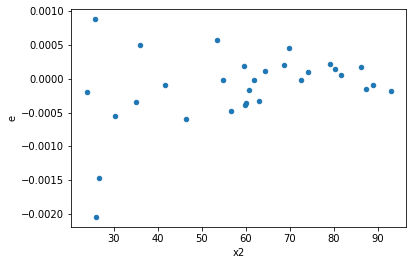

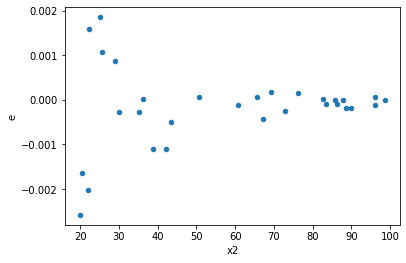

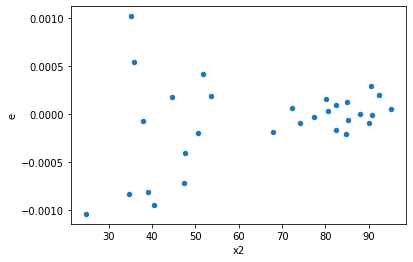

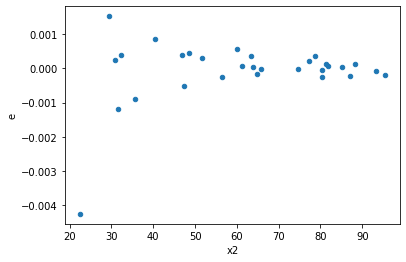

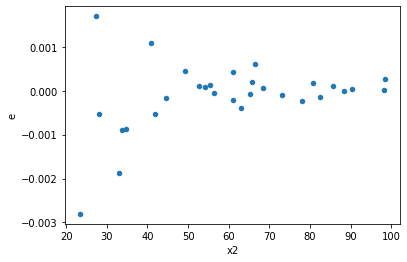

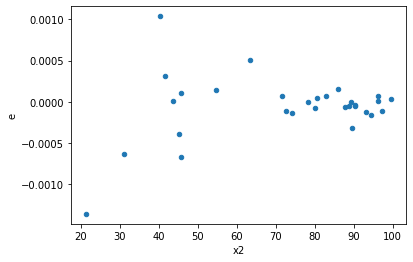

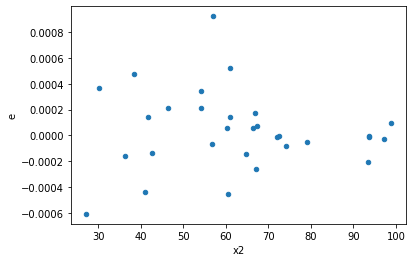

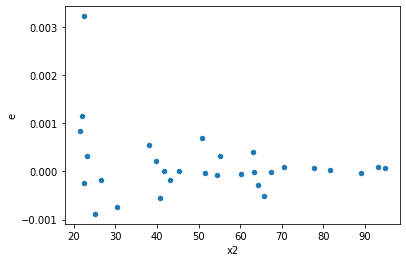

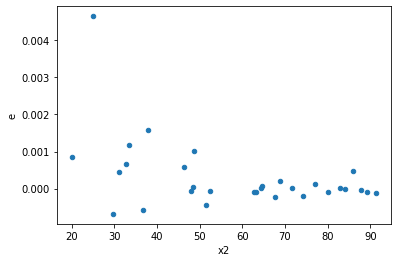

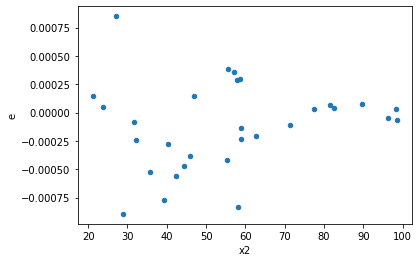

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,15.0,8.479076334535481e-07,6.877489631332763e-06,1.0598845418169352e-07,4.912492593809116e-07,4.8666784163651755,0.0213879221289901,0.989306038935505,Reject001=1 : Homoscedasticity
1.0,11.0,13.0,1.7849255945225678e-07,2.1582350980789748e-05,1.7849255945225677e-08,1.7985292483991457e-06,102.31232801792054,3.117534008723055e-09,0.999999998441233,Reject001=0 : Heteroscedasticity
2.0,13.0,11.0,1.6335475646439859e-06,1.7650152266730954e-06,1.3612896372033216e-07,1.7650152266730954e-07,1.2769307311371794,0.6669107686376963,0.6665446156811519,Reject001=1 : Homoscedasticity
4.0,10.0,14.0,2.5891227570233906e-06,6.283480760431858e-06,2.876803063359323e-07,4.833446738793737e-07,1.7334831000155106,0.38527187569337573,0.8073640621533121,Reject001=1 : Homoscedasticity
5.0,12.0,12.0,9.668384457871609e-07,1.4839121718835472e-06,8.789440416246917e-08,1.3490110653486791e-07,1.5348088176979826,0.46903612503367476,0.7654819374831626,Reject001=1 : Homoscedasticity
7.0,10.0,14.0,1.5924330271548421e-06,1.0217048244136675e-05,1.7693700301720467e-07,7.859267880105134e-07,4.58285621970157,0.02029060955246842,0.9898546952237658,Reject001=1 : Homoscedasticity
8.0,10.0,14.0,5.517052225163952e-07,1.1831048252454208e-05,6.130058027959946e-08,9.100806348041698e-07,15.31750726086678,0.00012936314941169869,0.9999353184252942,Reject001=0 : Heteroscedasticity
9.0,14.0,10.0,1.5577428486374958e-06,1.6643107831409255e-06,1.1982637297211505e-07,1.8492342034899172e-07,1.4957764681348384,0.47676055050778277,0.7616197247461086,Reject001=1 : Homoscedasticity
12.0,7.0,17.0,1.2632985424980823e-06,1.1193120743576527e-05,2.105497570830137e-07,6.995700464735329e-07,3.6483316617864685,0.0885677930236195,0.9557161034881902,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,15.0,8.479076334535481e-07,6.877489631332763e-06,1.0598845418169352e-07,4.912492593809116e-07,4.8666784163651755,0.0213879221289901,Reject001=1 : Homoscedasticity
1.0,11.0,13.0,1.7849255945225678e-07,2.1582350980789748e-05,1.7849255945225677e-08,1.7985292483991457e-06,102.31232801792054,3.117534008723055e-09,Reject001=0 : Heteroscedasticity
2.0,13.0,11.0,1.6335475646439859e-06,1.7650152266730954e-06,1.3612896372033216e-07,1.7650152266730954e-07,1.2769307311371794,1.3330892313623037,Reject001=1 : Homoscedasticity
3.0,11.0,13.0,2.0805272660746284e-05,3.811101941856786e-07,2.0805272660746285e-06,3.175918284880655e-08,0.01549981400758455,3.45114466046102e-09,Reject001=0 : Heteroscedasticity
4.0,10.0,14.0,2.5891227570233906e-06,6.283480760431858e-06,2.876803063359323e-07,4.833446738793737e-07,1.7334831000155106,0.38527187569337573,Reject001=1 : Homoscedasticity
5.0,12.0,12.0,9.668384457871609e-07,1.4839121718835472e-06,8.789440416246917e-08,1.3490110653486791e-07,1.5348088176979826,0.46903612503367476,Reject001=1 : Homoscedasticity
6.0,14.0,10.0,1.982615863822822e-06,4.006309711136087e-07,1.5250891260175556e-07,4.451455234595652e-08,0.2829006716800769,0.05074810390948268,Reject001=1 : Homoscedasticity
7.0,10.0,14.0,1.5924330271548421e-06,1.0217048244136675e-05,1.7693700301720467e-07,7.859267880105134e-07,4.58285621970157,0.02029060955246842,Reject001=1 : Homoscedasticity
8.0,10.0,14.0,5.517052225163952e-07,1.1831048252454208e-05,6.130058027959946e-08,9.100806348041698e-07,15.31750726086678,0.00012936314941169869,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    555
Reject001=1 : Homoscedasticity      445
Name: Result_test, dtype: int64